# IS362 - Assignment 8

Your task in this week’s assignment is to load a dataset, perform some minor cleanup and transformation tasks, then use exploratory data analysis to learn about the distribution of variables and the relationship between variables. Here is a link to the “Auto MPG” dataset in the UC Irvine data repository:
https://archive.ics.uci.edu/ml/datasets/Auto+MPG

1. Load the data in the (yellow highlighted) Data Folder in the file auto-mpg.data into a pandas DataFrame.
2. Review the data and the provided data set description.
3. Use the attribute information provided in auto-mpg.names to name your pandas DataFrame columns.
4. Some of the horsepower data is marked as missing with a ‘?’. You need to replace this ‘?’ with a pandas-appropriate missing value, then convert the column to numeric.
5. The origin column values are 1, 2, and 3. Convert these values respectively to ‘USA’, ‘Asia’, and ‘Europe’
6. Create a bar chart that shows the distribution for cylinders.
7. Create a scatterplot that shows the relationship between horsepower and weight.
8. Ask, then answer (using matplotlib and seaborn graphics capabilities) an interesting question about the distribution of one of the variables, or the relationship between two (or more!) of the variables in the “Auto MPG” dataset.

Let's begin by importing the modules we're going to be working with in this assignment:

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Now let's load the data in the UC Irvine data repository:

In [11]:
autompg = pd.read_fwf('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', header=None, names=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']).set_index('car name')
autompg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
car name,,,,,,,,
"""chevrolet chevelle malibu""",18.0,8,307.0,130.0,3504.0,12.0,70,1
"""buick skylark 320""",15.0,8,350.0,165.0,3693.0,11.5,70,1
"""plymouth satellite""",18.0,8,318.0,150.0,3436.0,11.0,70,1
"""amc rebel sst""",16.0,8,304.0,150.0,3433.0,12.0,70,1
"""ford torino""",17.0,8,302.0,140.0,3449.0,10.5,70,1


There are some missing and unclear values that we need to address, such as missing values for Horsepower, and vague information for Origin. We can use .replace() to modify these values:

In [36]:
autompg = autompg.replace(to_replace='?', value=np.nan)
autompg['origin'].replace(1, 'USA', inplace=True)
autompg['origin'].replace(2, 'Asia', inplace=True)
autompg['origin'].replace(3, 'Europe', inplace=True)
autompg['horsepower'].astype(float)
autompg['weight'].astype(float)
autompg['mpg'].astype(float)
autompg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
car name,,,,,,,,
"""chevrolet chevelle malibu""",18.0,8,307.0,130.0,3504.0,12.0,70,USA
"""buick skylark 320""",15.0,8,350.0,165.0,3693.0,11.5,70,USA
"""plymouth satellite""",18.0,8,318.0,150.0,3436.0,11.0,70,USA
"""amc rebel sst""",16.0,8,304.0,150.0,3433.0,12.0,70,USA
"""ford torino""",17.0,8,302.0,140.0,3449.0,10.5,70,USA


Now we want to get some visuals for this data. First, we want to look at the distribution for cylinders in a bar chart:

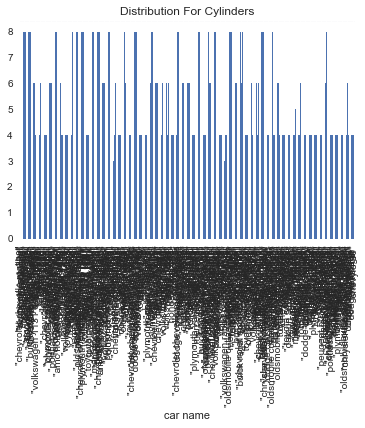

In [17]:
autompg.groupby('cylinders')
autompg['cylinders'].plot(kind='bar', title='Distribution For Cylinders')

Next, we want to create a scatterplot that analyzes the relationship between horsepower and weight:

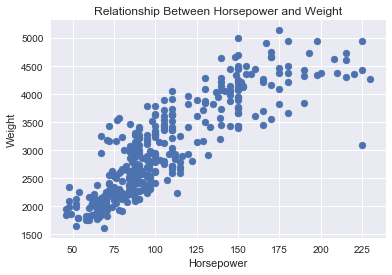

In [30]:
plt.scatter(autompg['horsepower'], autompg['weight'])
plt.title('Relationship Between Horsepower and Weight')
plt.xlabel('Horsepower')
plt.ylabel('Weight')
plt.show()

Let's look at a different scatterplot, this time analyzing the relationship between horsepower and miles per gallon:

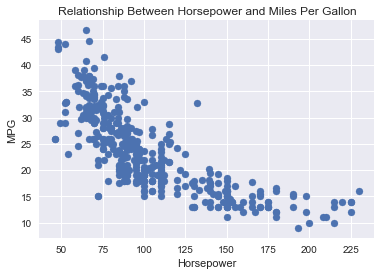

In [42]:
plt.scatter(autompg['horsepower'], autompg['mpg'])
plt.title('Relationship Between Horsepower and Miles Per Gallon')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.show()

The relationship between horsepower and acceleration is described below:

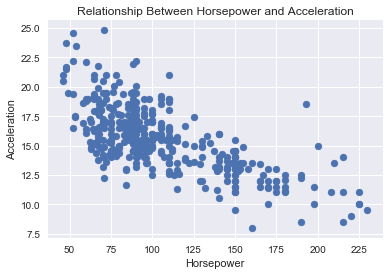

In [43]:
plt.scatter(autompg['horsepower'], autompg['acceleration'])
plt.title('Relationship Between Horsepower and Acceleration')
plt.xlabel('Horsepower')
plt.ylabel('Acceleration')
plt.show()

Let's look at how the car models are spread out by model year:

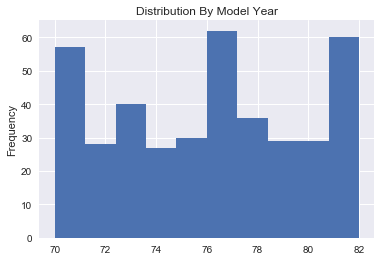

In [48]:
autompg.groupby('model year')
autompg['model year'].plot(kind='hist', title='Distribution By Model Year')